<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

## **Lab *2*: *Statistics & Data Visualization***

### **Tenggat Waktu: 17 September 2022, 23.55 WIB**
</center>

#### **Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_Lab2_NPM_Nama.ipynb**. Contoh: A_Lab2_2006123456_Budi.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **17 September 2022, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.


## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan pinalti.

In [ ]:
# Isi dengan data diri Anda
NAMA = "Sultan Fahrezy Syahdwinata Nugraha"
KELAS = "C"
NPM = "2006533811"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [ ]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Sultan Fahrezy Syahdwinata Nugraha dari kelas C dengan NPM 2006533811, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Sultan Fahrezy Syahdwinata Nugraha)


# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) merupakan suatu proses menganalisis dataset untuk melihat karakteristik utama dari data. EDA adalah pemrosesan dasar yang dapat mempengaruhi keputusan-keputusan seorang data scientist dalam memproses data di tahap selanjutnya. Proses ini sering melibatkan dua hal, di antaranya *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset Fuel Consumption

Tabel di bawah menunjukkan data rate penggunaan bahan bakar dan perkiraan emisi Karbon Dioksida pada mobil ringan di Kanada pada tahun 2022.
* `Make`: Nama brand mobil
* `Model`: Nama model mobil
* `Vehicle Class`: Nama kelas atau tipe kendaraan
* `Engine Size(L)`: Ukuran mesin
* `Cylinders`: Jumlah *cylinder* yang ada pada mesin
* `Transmission`: Jenis transmisi kendaraan
* `Fuel Type`: Tipe bahan bakar yang digunakan
* `Fuel Consumption (City (L/100 km)`: Rata-rata konsumsi bahan bakar dalam perkotaan
* `Fuel Consumption(Hwy (L/100 km))`: Rata-rata konsumsi bahan bakar dalam jalan raya
* `Fuel Consumption(Comb (L/100 km))`: Rata-rata konsumsi bahan bakar dalam perkotaan dan jalan raya
* `CO2 Emissions(g/km)`: Emisi gas buang karbon dioksida (dalam gram per kilometer) untuk gabungan mengemudi di kota dan jalan raya
* `CO2 Rating`: Emisi knalpot karbon dioksida dinilai pada skala dari 1 (terburuk) hingga 10 (terbaik)
* `Smog Rating`: Emisi knalpot polutan pembentuk asap yang dinilai pada skala dari 1 (terburuk) hingga 10 (terbaik)
* `Region` : Region brand mobil berasal


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scp
import plotly.express as px
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit

In [ ]:
df = pd.read_csv('FuelConsumptionCO2.csv')

In [ ]:
total_rows, total_attributes = df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

df.head()

Jumlah data: 946
Jumlah atribut: 14


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating,Region
0,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,200,6,3,Asia
1,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,263,4,5,Asia
2,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,232,5,6,Asia
3,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,242,5,6,Asia
4,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,230,5,7,Asia


In [ ]:
# Melihat kolom-kolom pada dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Make                               946 non-null    object 
 1   Model                              946 non-null    object 
 2   Vehicle Class                      946 non-null    object 
 3   Engine Size(L)                     946 non-null    float64
 4   Cylinders                          946 non-null    int64  
 5   Transmission                       946 non-null    object 
 6   Fuel Type                          946 non-null    object 
 7   Fuel Consumption (City (L/100 km)  946 non-null    float64
 8   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 9   Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 10  CO2 Emissions(g/km)                946 non-null    int64  
 11  CO2 Rating                         946 non-null    int64  

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,3.198732,5.668076,12.506448,9.363319,11.092072,259.172304,4.539112,4.950317
std,1.374814,1.932670,3.452043,2.285125,2.876276,64.443149,1.471799,1.679842
min,1.200000,3.000000,4.000000,3.900000,4.000000,94.000000,1.000000,1.000000
25%,2.000000,4.000000,10.200000,7.700000,9.100000,213.250000,3.000000,3.000000
50%,3.000000,6.000000,12.200000,9.200000,10.800000,257.000000,5.000000,5.000000
75%,3.800000,6.000000,14.700000,10.700000,12.900000,300.750000,5.000000,6.000000
max,8.000000,16.000000,30.300000,20.900000,26.100000,608.000000,10.000000,7.000000


In [ ]:
df.describe(include=['object'])

,Make,Model,Vehicle Class,Transmission,Fuel Type,Region
count,946,946,946,946,946,946
unique,39,715,14,23,4,3
top,Ford,Silverado 4WD Mud Terrain Tire,SUV: Small,AS8,Z,Europe
freq,89,5,197,212,458,352


# Descriptive Statistics
Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mengingat materi dari StatProb, ada
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara `median` lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `Engine Size(L)`:

In [ ]:
engine_arr = df['Engine Size(L)']

stats = [
    ['Mean', np.mean(engine_arr)],
    ['Median', np.median(engine_arr)],
    ['Mode', scp.mode(engine_arr)[0][0]],
    ['Standard Deviation', np.std(engine_arr)],
    ['Variance', np.var(engine_arr)],
    ['Minimum', np.min(engine_arr)],
    ['Maximum', np.max(engine_arr)],
]

pd.DataFrame(stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,3.198732
1,Median,3.000000
2,Mode,2.000000
3,Standard Deviation,1.374088
4,Variance,1.888117
5,Minimum,1.200000
6,Maximum,8.000000


Pada hasil diatas, bisa kita lihat bahwa `mean` > `median` > `mode`. Data tersebar sebesar 1.37 dari nilai `mean`. dengan nilai maksimum 8 dan minimum 1.2. Kemungkinan data cenderung padat di nilai yang rendah atau padat ke kiri.

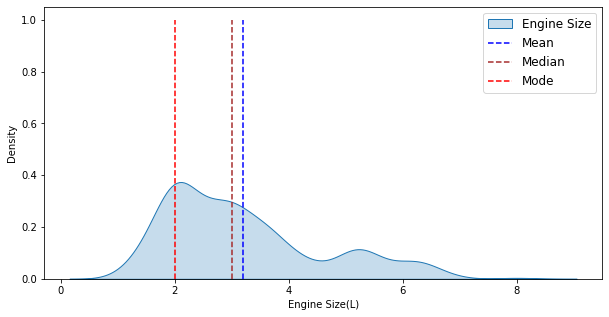

In [ ]:
plt.figure(figsize=(10,5))
sns.kdeplot(engine_arr, shade=True)
plt.vlines(x=np.mean(engine_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(engine_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(engine_arr)[0][0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['Engine Size', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Bisa dilihat bahwa distribusi bersifat `right skewed` karena lebih berat di kiri dan ekornya panjang di kanan. Berdasarkan visualisasi, `median`, `mean`, `modus` tidak selalu sama. Pada kasus ini, median dapat menjadi pengukuran yang tepat untuk menggambarkan central tendency dari data

Untuk membandingkan distribusi data A ke data B, kita dapat menggunakan overlapping KDE plot.

Misal kita ingin membandingkan distribusi Engine Size pada Honda dan Hyundai.

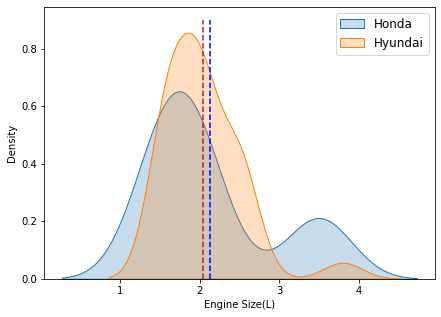

In [ ]:
# KDE Plot
honda = df[df['Make'] == 'Honda']
hyundai = df[df['Make'] == 'Hyundai']
plt.figure(figsize=(7,5))
sns.kdeplot(honda['Engine Size(L)'], shade=True)
sns.kdeplot(hyundai['Engine Size(L)'], shade=True)
plt.legend(['Honda','Hyundai'], fontsize=12)
plt.vlines(x=honda['Engine Size(L)'].mean(), ymin=0, ymax=0.9, color='blue', linestyle='--')
plt.vlines(x=hyundai['Engine Size(L)'].mean(), ymin=0, ymax=0.9, color='brown', linestyle='--')
plt.show()

# Correlation

Korelasi merupakan pengukuran dependensi antar atribut dalam data. Korelasi sering digunakan untuk mengukur apakah suatu atribut memiliki hubungan yang kuat secara linier atau tidak.

Terdapat beberapa jenis korelasi yang dapat digunakan pada jenis data yang berbeda. ***Pearson correlation*** umum digunakan untuk mengukur korelasi pada atribut numerik.

In [ ]:
df.corr(method='pearson')

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,0.971671,-0.927705,-0.490473
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,-0.520437,0.502625,1.000000


Dari korelasi pearson diatas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi (warna hijau gelap). Untuk membuktikan, dibawah terdapat 2 scatterplot yang menunjukkan hubungan linear dengan `Cylinders`, yakni
* `Engine Size(L)`: 0.92
* `CO2 Rating`: -0.77

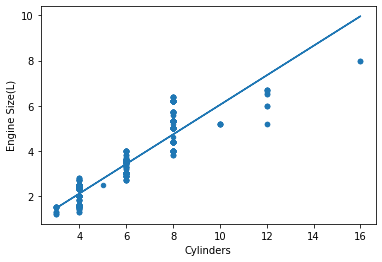

In [ ]:
w = df["Cylinders"]
z = df["Engine Size(L)"]
df.plot.scatter(x="Cylinders", y="Engine Size(L)", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

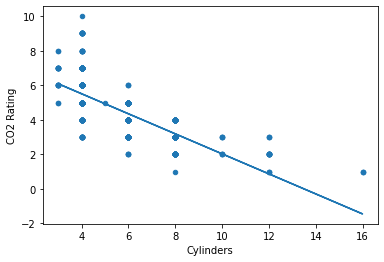

In [ ]:
w = df["Cylinders"]
z = df["CO2 Rating"]
df.plot.scatter(x="Cylinders", y="CO2 Rating", figsize=(6,4))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()

# Data Visualization

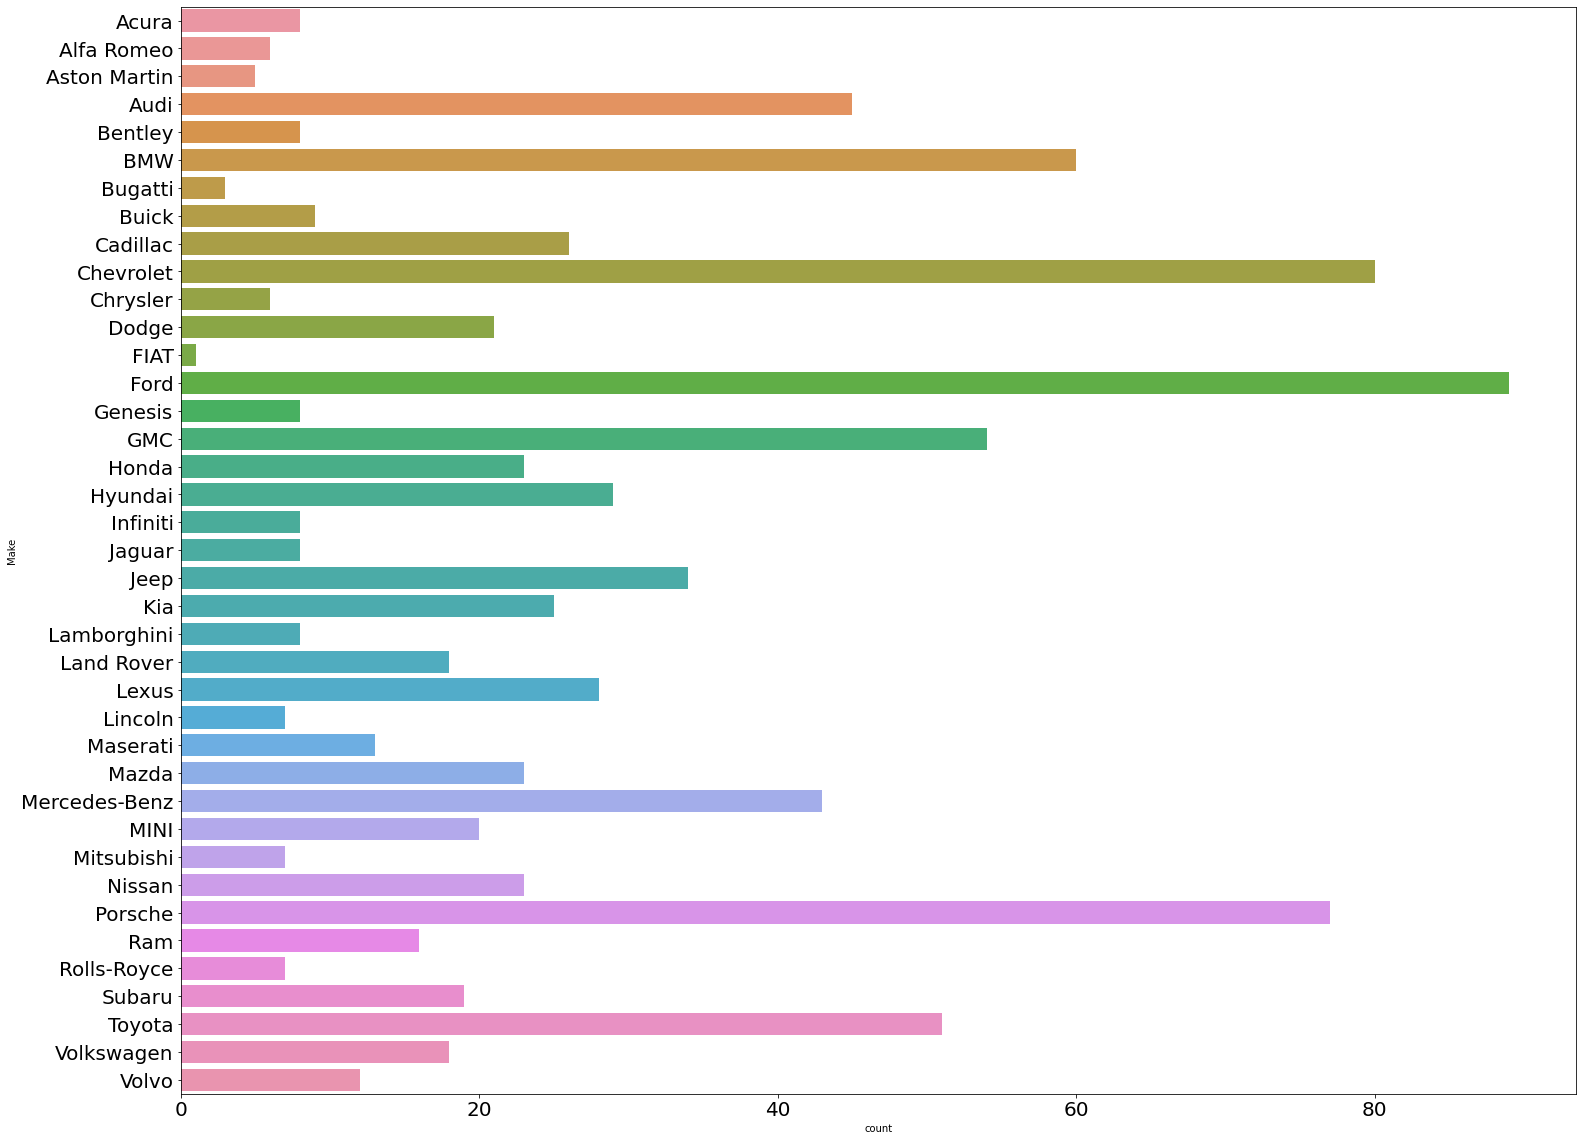

In [ ]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks
plt.xticks(size=20)
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
sns.countplot(y='Make', data=df)

Bisa kita lihat pada countplot di atas, Ford adalah brand mobil yang paling banyak digunakan di Kanada

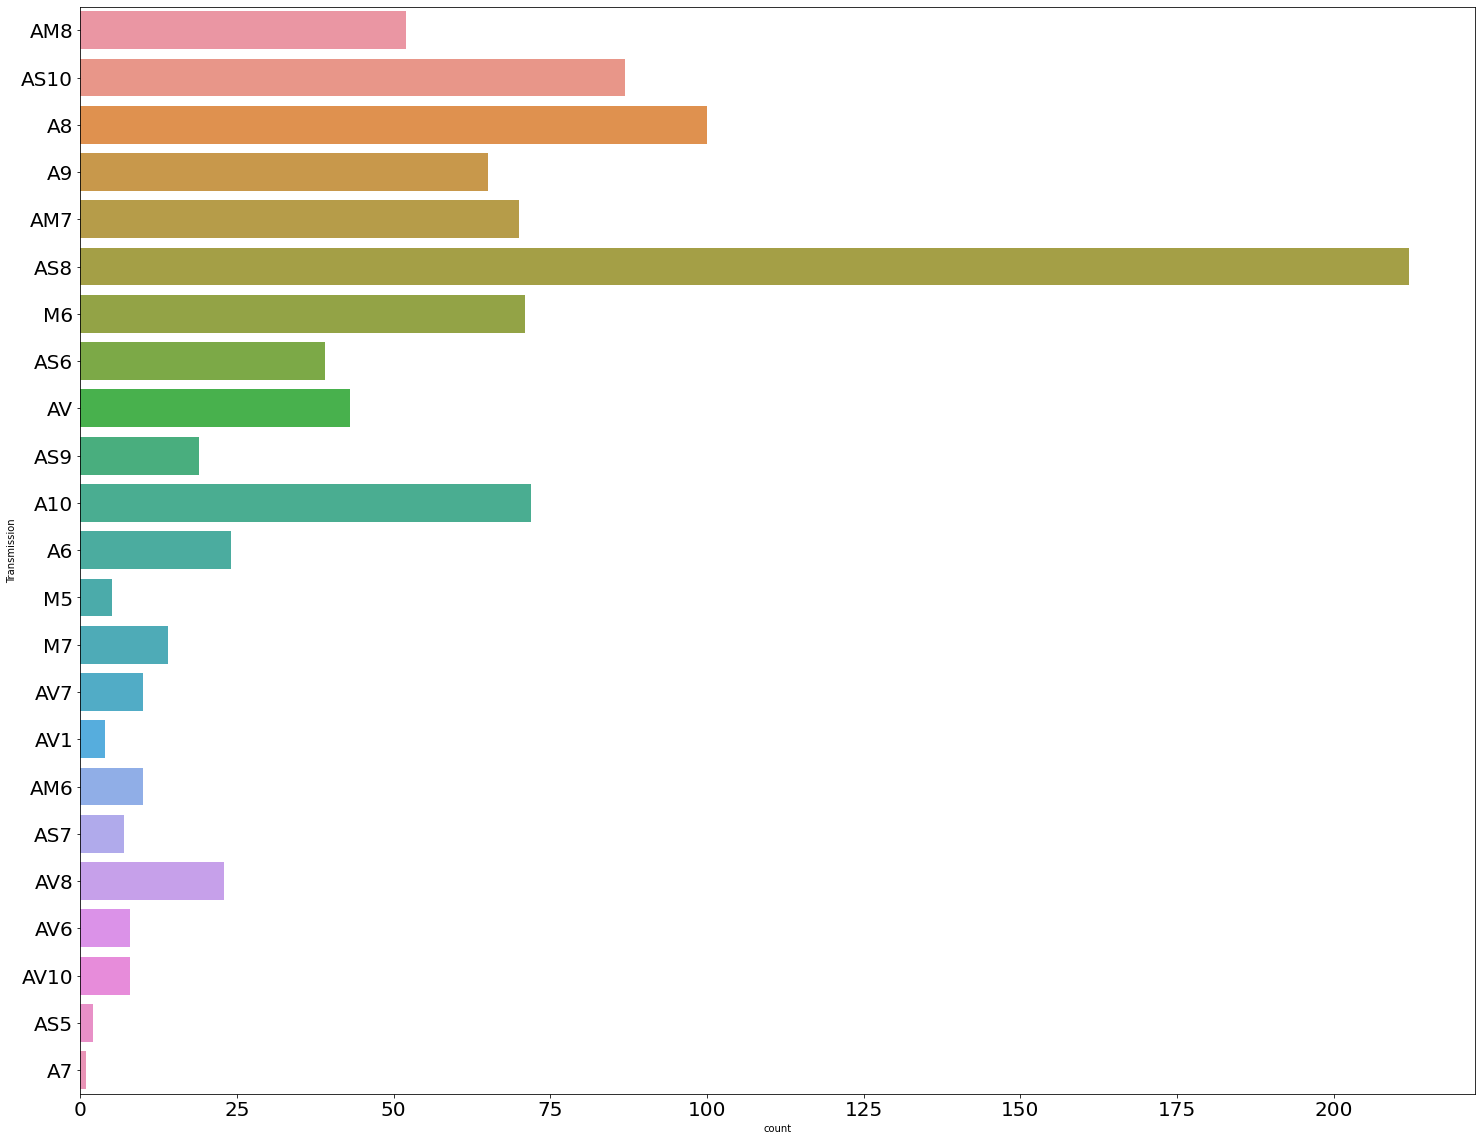

In [ ]:
plt.figure(figsize=(25,20))
plt.yticks(size=20)

#to increase x ticks
plt.xticks(size=20)
sns.countplot(y='Transmission', data=df)

Dari countplot, transmisi AS8 paling banyak digunakan, dan A7 paling sedikit

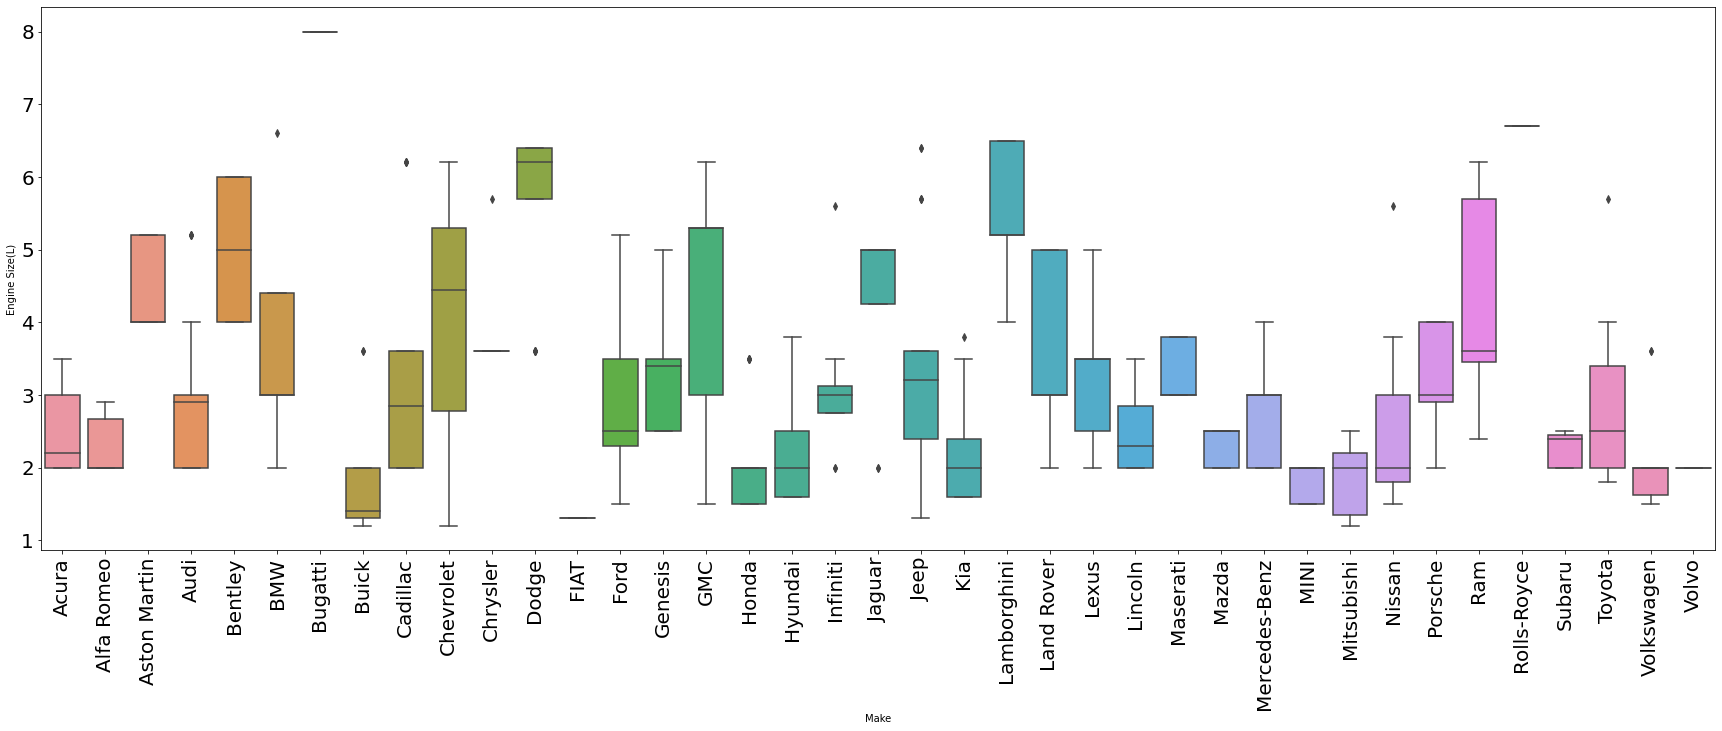

In [ ]:
# Menampilkan boxplot Make terhadap Engine Size(L)
plt.figure(figsize=(30,10))
plt.xticks(size=20, rotation=90)
plt.yticks(size=20)
sns.boxplot(data=df, x='Make', y='Engine Size(L)')

# Latihan Soal

### **SOAL 1: Descriptive Statistics**

(a) Tampilkan descriptive statistics dari atribut `CO2 Emissions(g/km)`! (hint: tambahkan range, Q1, Q2, Q3)

In [ ]:
from numpy.core.numeric import array_equiv
# Jawab
array_equiv = df['CO2 Emissions(g/km)']

stats = [
    ['Mean', np.mean(array_equiv)],
    ['Median (Q2)', np.median(array_equiv)],
    ['Mode', scp.mode(array_equiv)[0][0]],
    ['Standard Deviation', np.std(array_equiv)],
    ['Variance', np.var(array_equiv)],
    ['Minimum', np.min(array_equiv)],
    ['Maximum', np.max(array_equiv)],
    ['Q1', array_equiv.quantile(0.25)],
    ['Q2', array_equiv.quantile(0.75)]
]

pd.DataFrame(stats, columns=['Stats', 'Value'])

,Stats,Value
0,Mean,259.172304
1,Median (Q2),257.000000
2,Mode,275.000000
3,Standard Deviation,64.409079
4,Variance,4148.529508
5,Minimum,94.000000
6,Maximum,608.000000
7,Q1,213.250000
8,Q2,300.750000


(b) Apa central tendency paling cocok untuk atribut `CO2 Emissions(g/km)`? Berikan alasan!

In [ ]:
# Jawab
print("Menurut saya jenis central tendency yang paling cocok digunakan adalah mean atau median, dikarenakan data tersebut tersebar dengan distribusi lumayan normal dan walaupun ada outliers tapi jumlahnya tidak banyak. Oleh karena itu, mean dan mediannya tidak terlalu berbeda.")

Menurut saya jenis central tendency yang paling cocok digunakan adalah mean atau median, dikarenakan data tersebut tersebar dengan distribusi lumayan normal dan walaupun ada outliers tapi jumlahnya tidak banyak. Oleh karena itu, mean dan mediannya tidak terlalu berbeda.


(c) Buatlah heatmap dari korelasi pearson pada dataset `FuelConsumptionCO2.csv`!

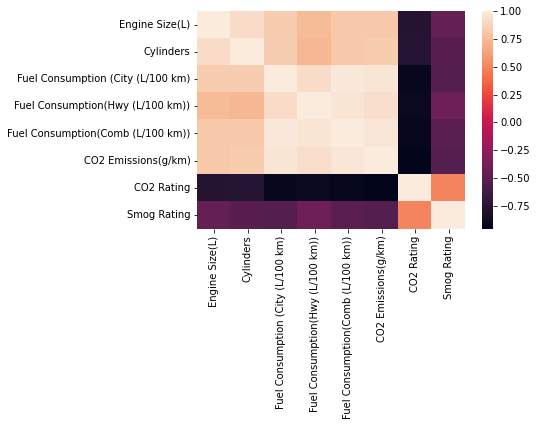

In [ ]:
# Jawab

heat_map = sns.heatmap(df.corr())
heat_map

### **SOAL 2: Data Visualization**

Untuk setiap sub-soal, pilih salah satu dari visualisasi berikut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* KDE Plot

Beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan.

**Secara eksplisit, tulis chart apa yang Anda pilih dan alasannya.**

(a) Buatlah visualisasi untuk melihat jumlah rata-rata ukuran mesin yang dimiliki tiap brand mobil. Apakah mobil Dodge memiliki ukuran mesin terbesar?

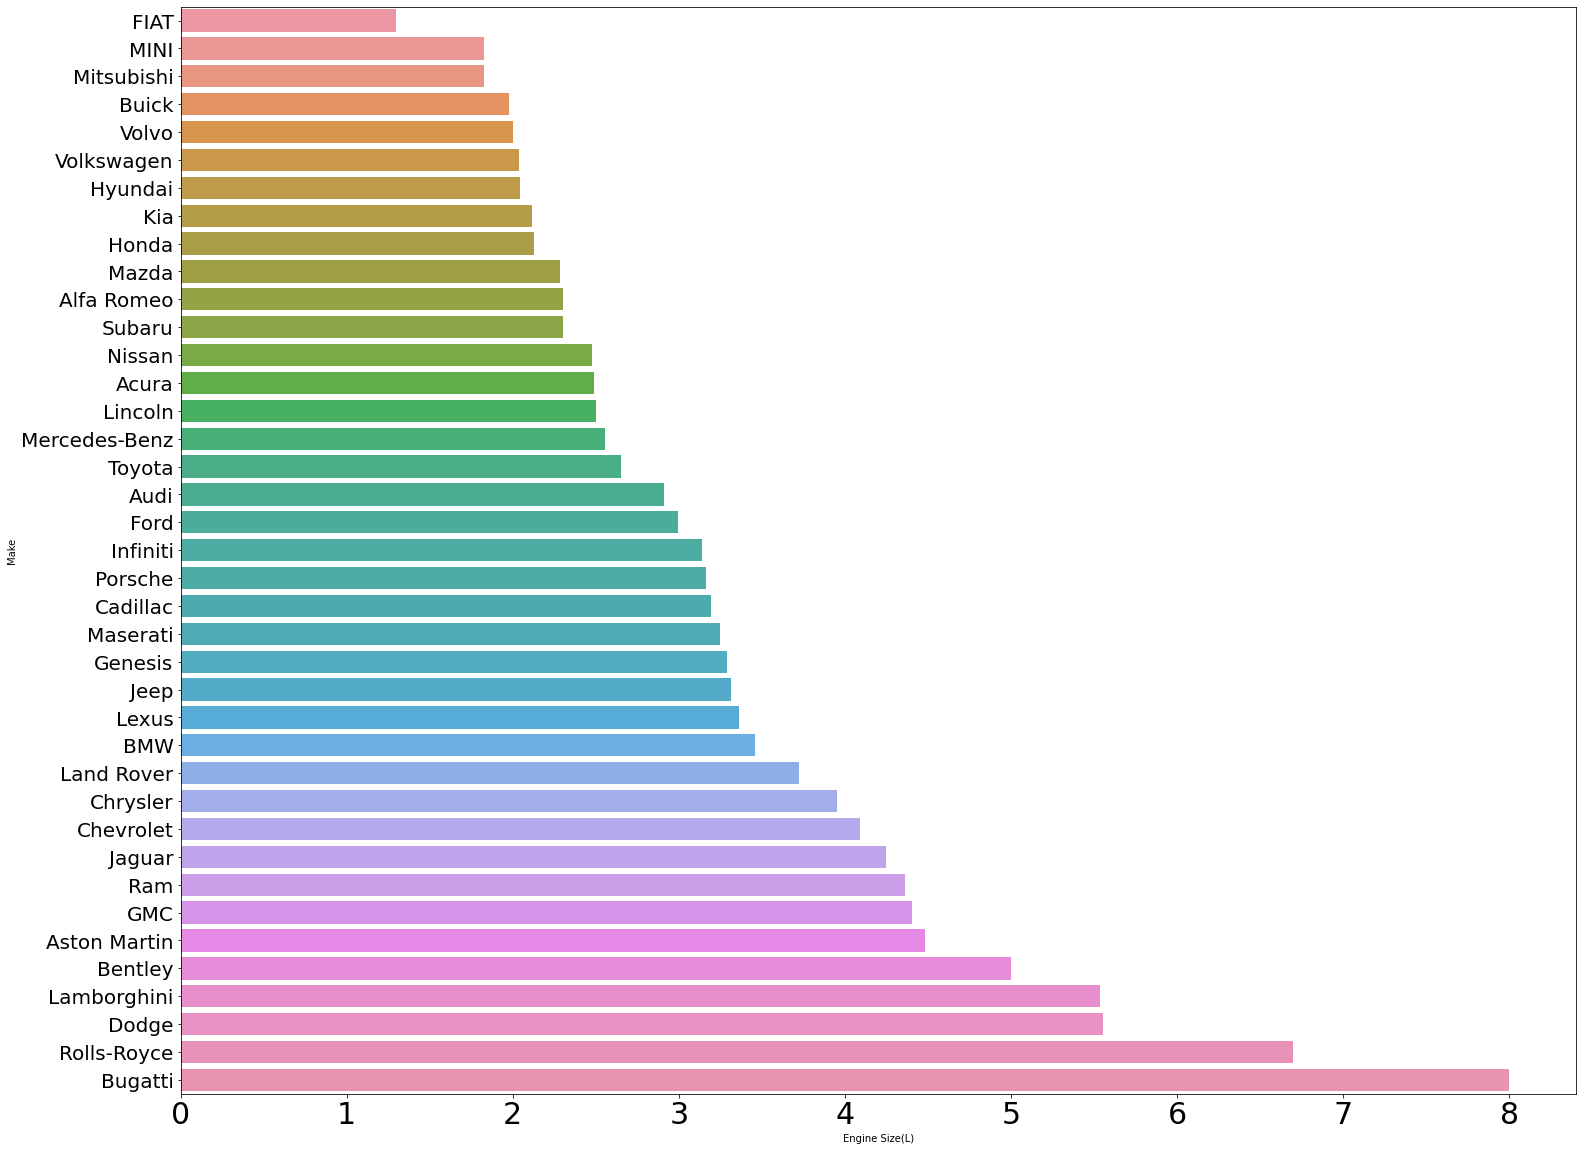

In [ ]:
# Jawab
# untuk soal ini saya memilih menggunakan bar chart karena kita ingin melihat sebuah
# nilai dari masing-masing manufacturer dan membandingkan mana yang memiliki nilai
# paling besar. Visualisasi yang paling cocok digunakan untuk hal tersebut adalah
# bar cart dan histogram. Namun karena data yang digunakan adalah nilai diskret,
# bukan sebuah rentang maka visualisasi yang paling cocok digunakan adalah bar
# chart
df_by_mean = df.groupby('Make').mean().reset_index()

plt.figure(figsize=(25,20))
plt.yticks(size=20)

plt.xticks(size=30)
sns.barplot(y='Make', x='Engine Size(L)', data=df_by_mean.sort_values("Engine Size(L)"))
# Dodge tidak memiliki ukuran mesin paling besar, melainkan bugatti

(b) Buatlah visualisasi dari persentase mobil yang memiliki smog rating dengan nilai >= 7. Berapakah persentase dari mobil Eropa yang memiliki smog rating yang bernilai >= 7?

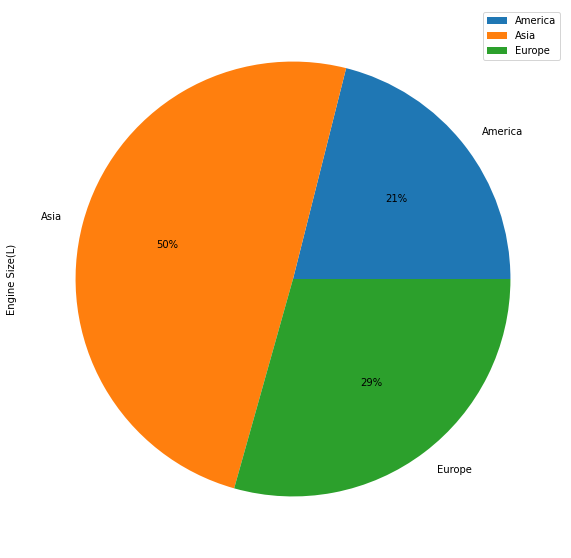

In [ ]:
# Jawab
# karena diminta untuk menunjukkan presentase maka visualisasi yang cocok digunakan
# adalah pie chart
df_filtered = df[df['Smog Rating'] >= 7]

df_filtered.groupby(['Region']).sum().plot.pie(y='Engine Size(L)', figsize=(10, 10), autopct='%1.0f%%')
# mobil eropa memiliki persentase 29%

(c) Buatlah visualisasi untuk melihat apakah ada outliers di atribut `Engine Size(L)` untuk setiap transmisi. Berikan satu contoh transmisi yang terlihat memiliki outlier.

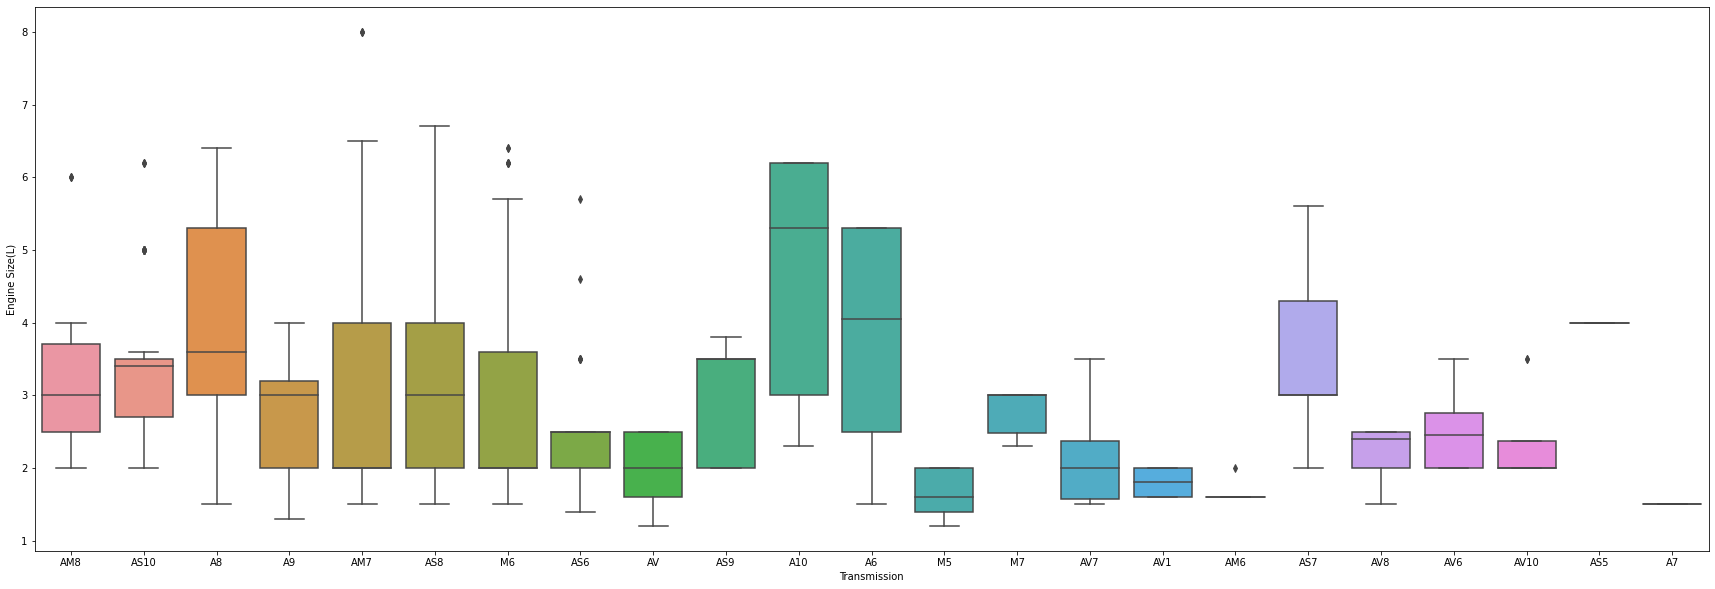

In [ ]:
# jawab
# untuk membuat visualisasi yang melihat adanya outliers, maka boxplot merupakan
# jenis visualisasi yang tepat karena boxplot menyediakan nilai minimum dan nilai
# maksimum dan outliers
plt.figure(figsize=(30,10))

sns.boxplot(data=df, x='Transmission', y='Engine Size(L)')
# contohnya adalah AM8 yang memiliki outliers

(d) Buatlah visualisasi untuk melihat pola atau pattern antara Engine Size(L) dan Fuel Consumption(Comb (L/100 km)). **Menurut Anda, apa hubungan yang dimiliki antara Engine Size dan Fuel Consumption? Jelaskan!**

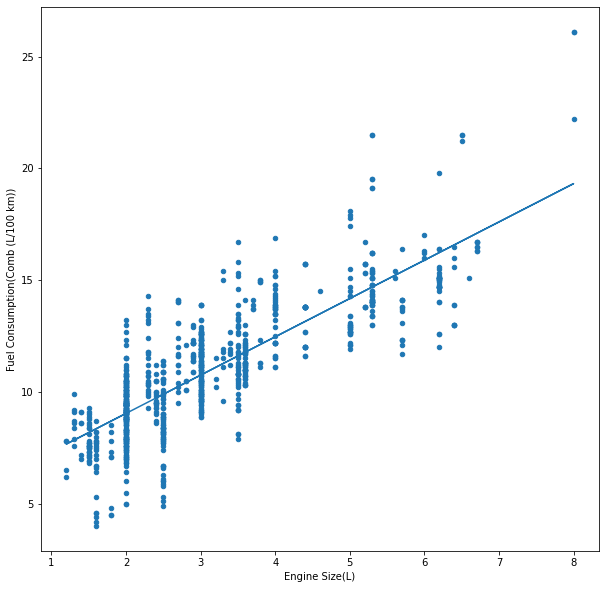

In [ ]:
# Jawab
# untuk mencari pola antara pasangan dua variable maka visualisasi yang paling tepat digunakan
# adalah scatterplot
w = df["Engine Size(L)"]
z = df["Fuel Consumption(Comb (L/100 km))"]
df.plot.scatter(x="Engine Size(L)", y="Fuel Consumption(Comb (L/100 km))", figsize=(10,10))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()
# berdasarkan visualisasi pada scatter plot maka hubungan diantara kedua variable
# tersebut cenderung positif yang berarti jika nilai engine size (L) bertambah maka fuel
# consumption (comb (L/100 km)) juga akan bertambah

(e) Visualisasikan distribusi data CO2 Emissions pada BMW dan Mercedes-Benz. Berikan analisis Anda!

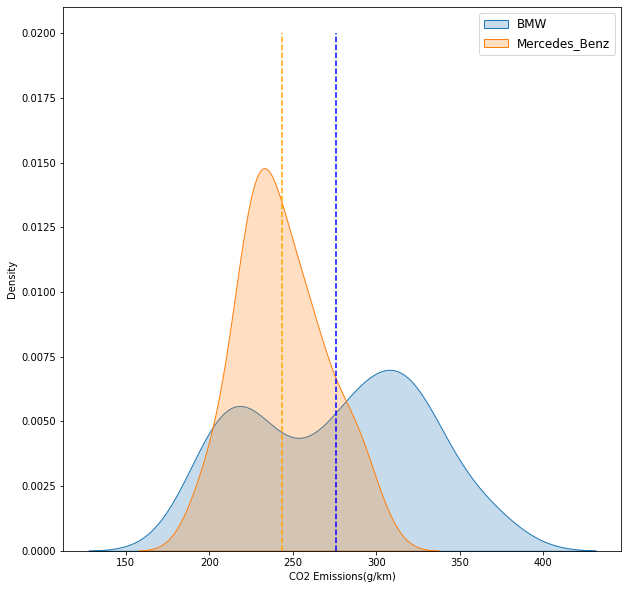

In [ ]:
# Jawab

BMW = df[df['Make'] == 'BMW']
Mercedez_Benz = df[df['Make'] == 'Mercedes-Benz']
plt.figure(figsize=(10,10))
sns.kdeplot(BMW['CO2 Emissions(g/km)'], shade=True)
sns.kdeplot(Mercedez_Benz['CO2 Emissions(g/km)'], shade=True)
plt.legend(['BMW','Mercedes_Benz'], fontsize=12)
plt.vlines(x=BMW['CO2 Emissions(g/km)'].mean(), ymin=0, ymax=0.02, color='blue', linestyle='--')
plt.vlines(x=Mercedez_Benz['CO2 Emissions(g/km)'].mean(), ymin=0, ymax=0.02, color='orange', linestyle='--')
plt.show()

# pada visualisasi tersebut dapat terlihat bahwa mobil-mobil dari mercedes benz
# memiliki emisi CO2 yang kurang lebih sama, hal ini dapat terlihat dari distribusi
# mercedes benz yang lebih terpusat. Sementara mobil-mobil BMW memiliki emisi CO2
# yang lebih beragam.

(f) Buatlah visualisasi untuk mengetahui brand mobil Asia mana yang memiliki rata rata `Fuel Consumption(Comb (L/100 km))` yang paling rendah (paling irit). Apa yang membuat brand mobil tersebut irit? `hint: Gunakan Descriptive Statistics`

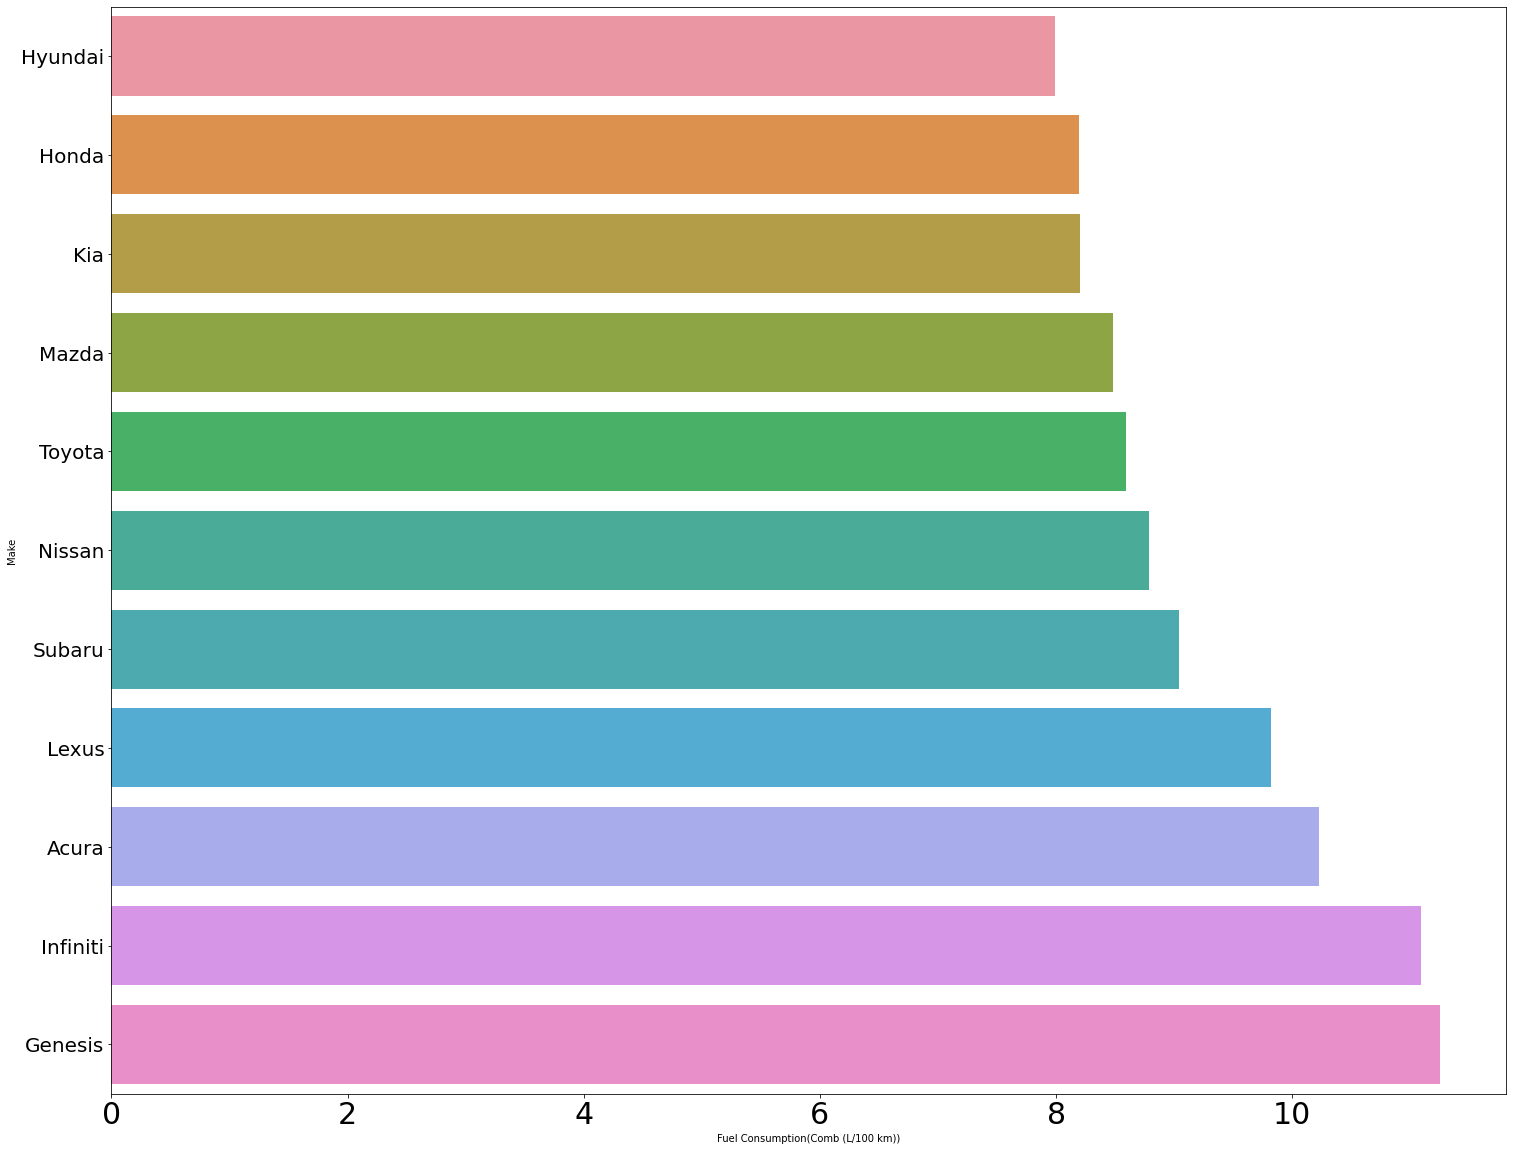

In [ ]:
# Jawab
asia = df[df['Region'] == 'Asia']
df_by_mean_asia = asia.groupby('Make').mean().reset_index()
plt.figure(figsize=(25,20))
plt.yticks(size=20)

plt.xticks(size=30)
sns.barplot(y='Make', x='Fuel Consumption(Comb (L/100 km))', data=df_by_mean_asia.sort_values("Fuel Consumption(Comb (L/100 km))"))
# brand paling irit adalah Hyundai

Seperti yang diketahui sebelumnya ada korelasi positif antara ukuran mesin dan konsumsi bensin


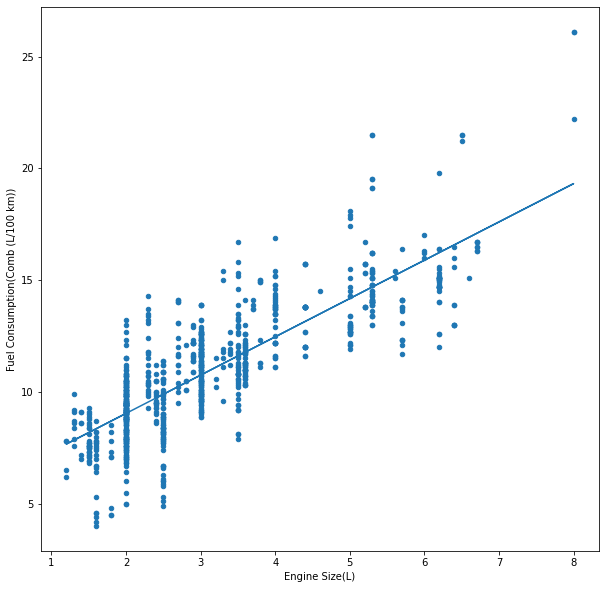

Dan jika kita perhatikan diantara brand mobil asia, hyundai merupakan brand dengan ukuran mesin paling kecil
Dapat ditarik hubungan bahwa hyundai memiliki konsumsi paling sedikit karena ukuran mesinnya yang paling kecil


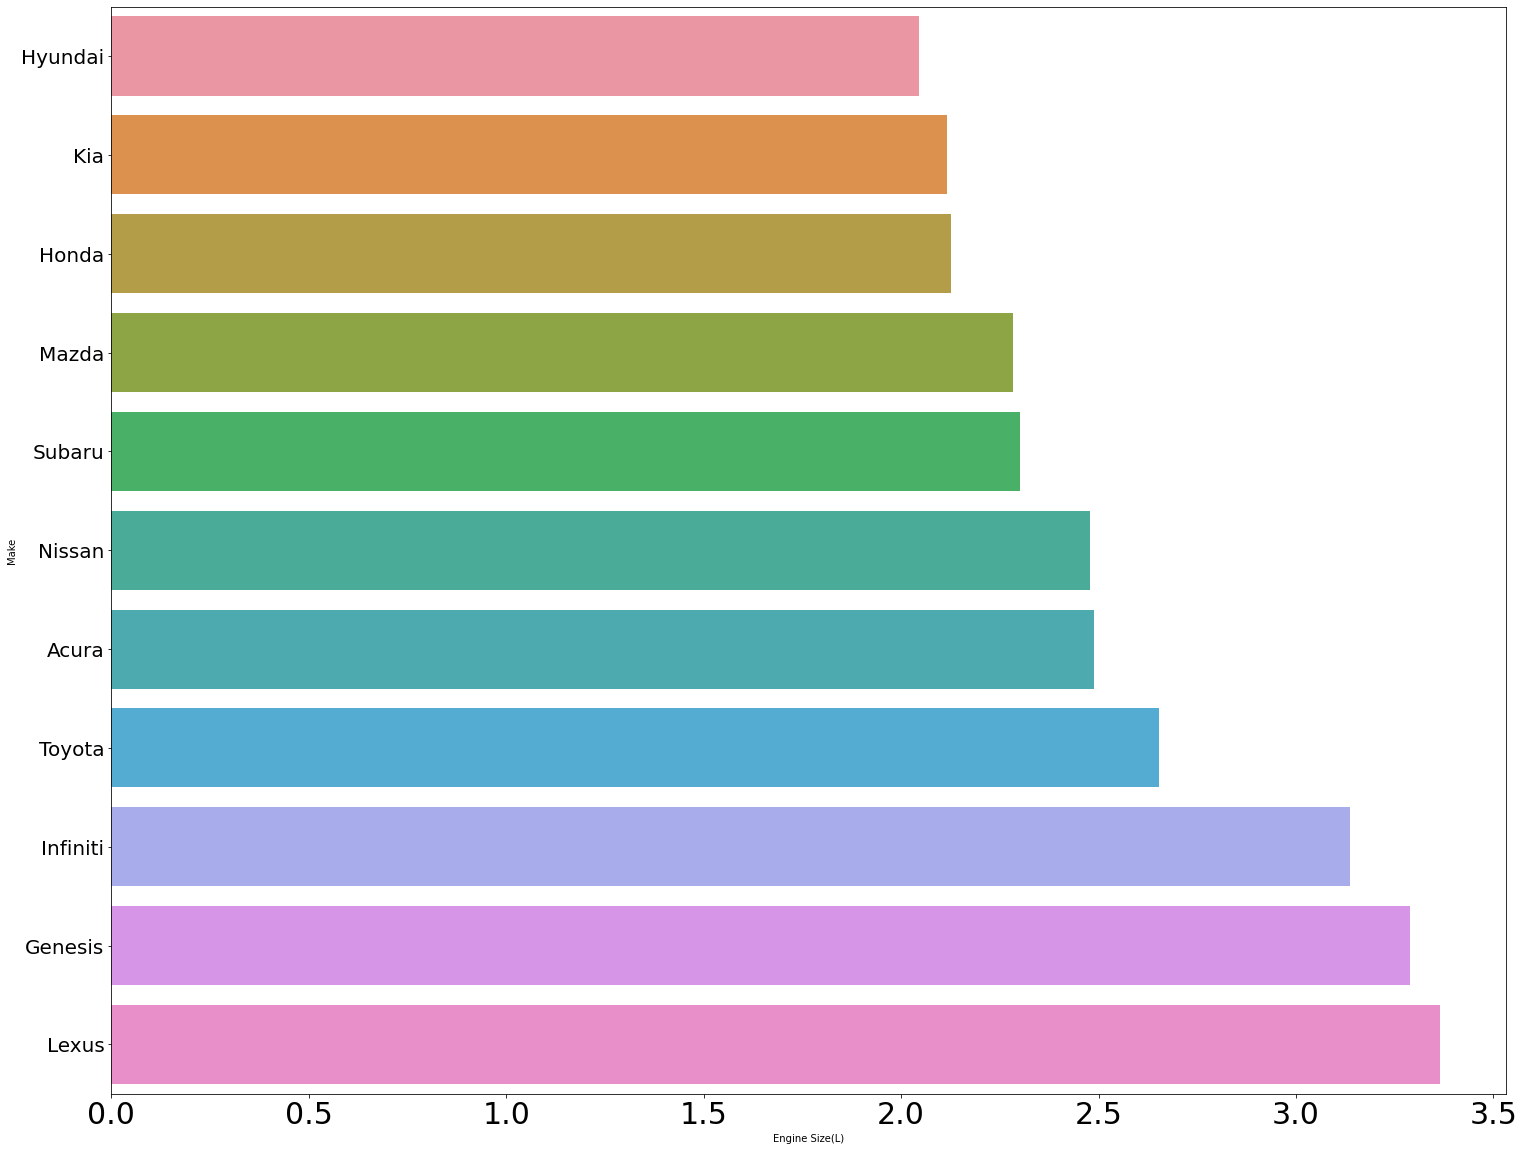

In [ ]:
print("Seperti yang diketahui sebelumnya ada korelasi positif antara ukuran mesin dan konsumsi bensin")
w = df["Engine Size(L)"]
z = df["Fuel Consumption(Comb (L/100 km))"]
df.plot.scatter(x="Engine Size(L)", y="Fuel Consumption(Comb (L/100 km))", figsize=(10,10))
b, m = polyfit(w, z, 1)
plt.plot(w, b + m * w, '-')
plt.show()
print("Dan jika kita perhatikan diantara brand mobil asia, hyundai merupakan brand dengan ukuran mesin paling kecil")
asia = df[df['Region'] == 'Asia']
df_by_mean_asia = asia.groupby('Make').mean().reset_index()

plt.figure(figsize=(25,20))
plt.yticks(size=20)

plt.xticks(size=30)
sns.barplot(y='Make', x='Engine Size(L)', data=df_by_mean_asia.sort_values("Engine Size(L)"))
print("Dapat ditarik hubungan bahwa hyundai memiliki konsumsi paling sedikit karena ukuran mesinnya yang paling kecil")